In [1]:
import numpy as np

import matplotlib.pyplot as plt


In [2]:

r = 0.05
kappa = 0.5
sigma = 0.5
theta = 0.9

rho = 0.2

nu = 1
S0 = 1


In [3]:
def heston_model(r, kappa, sigma, theta, rho, nu, M, n):
    dt = 2 ** (-n)
    S = S0 * np.ones(M)
    Nu = nu * np.ones(M)

    for i in range(2 ** n):
        dW1 = np.random.normal(0, 1, M).astype('float64') * np.sqrt(dt)
        dW2 = rho * dW1 + (1 - rho) * np.random.normal(0, 1, M).astype('float64') * np.sqrt(dt)
        S = S + (r * dt * S) + np.sqrt(Nu) * S * dW1

        Nu = (Nu + kappa * dt * (theta - Nu) + sigma * np.sqrt(Nu) * dW2).clip(0)
        # nu = max(nu + kappa * (theta - nu) * dt + zeta * np.sqrt(nu)*dW2 , 0)

    return np.mean(S)


In [35]:
def heston_multipas(r, kappa, sigma, theta, rho, nu, L, l):
    dt = 2 ** (-l)

    M = 100000

    S = S0 * np.ones(M)
    S1 = S0 * np.ones(M)
    S2 = S0 * np.ones(M)

    Nu = nu * np.ones(M)
    Nu1 = nu * np.ones(M)
    Nu2 = nu * np.ones(M)

    print(dt)
    for i in range(2 ** (l - 1)):
        dW1 = np.random.normal(0, 1, [2, M]).astype('float64') * np.sqrt(dt)
        dW2 = rho * dW1 + (1 - rho) * np.random.normal(0, 1, [2, M]).astype('float64') * np.sqrt(dt)

        Nu = (Nu + kappa * 2 * dt * (theta - Nu) + sigma * np.sqrt(Nu) * (dW2[0] + dW2[1])).clip(0)
        S = S + (r * 2 * dt * S) + np.sqrt(Nu) * S * (dW1[0] + dW1[1])

        Nu1 = (Nu1 + kappa * dt * (theta - Nu1) + sigma * np.sqrt(Nu1) * dW2[0]).clip(0)
        S1 = S1 + (r * dt * S1) + np.sqrt(Nu1) * S1 * dW1[0]

        Nu1 = (Nu1 + kappa * dt * (theta - Nu1) + sigma * np.sqrt(Nu1) * dW2[1]).clip(0)
        S1 = S1 + (r * dt * S1) + np.sqrt(Nu1) * S1 * dW1[1]

        Nu2 = (Nu2 + kappa * dt * (theta - Nu2) + sigma * np.sqrt(Nu2) * dW2[1]).clip(0)
        S2 = S2 + (r * dt * S2) + np.sqrt(Nu2) * S2 * dW1[1]

        Nu2 = (Nu2 + kappa * dt * (theta - Nu2) + sigma * np.sqrt(Nu2) * dW2[0]).clip(0)
        S2 = S2 + (r * dt * S2) + np.sqrt(Nu2) * S2 * dW1[0]

    Sant = 0.5 * (S1.clip(1) + S2.clip(1))
    var0 = np.mean(S.clip(1))
    var1 = np.mean(S.clip(1) - S1.clip(1))
    # var2 = np.var(Sant)
    var3 = np.mean(S.clip(1) - Sant.clip(1))
    print(np.mean(S), np.mean(S1), np.mean(S - Sant))
    print(var0, var1, var3)
    return var0, var1, var3 


In [41]:
def heston_milstein_multilevel(r, kappa, sigma, theta, rho, nu, L, l):
    print("heston milstein")
    dt = 2 ** (-l)

    M = 1000000

    S = np.log(S0) * np.ones(M)
    S1 = np.log(S0) * np.ones(M)
    S2 = np.log(S0) * np.ones(M)

    Nu = nu * np.ones(M)
    Nu1 = nu * np.ones(M)
    Nu2 = nu * np.ones(M)

    print(dt)
    for i in range(2 ** (l - 1)):
        dW1 = np.random.normal(0, 1, [2, M]).astype('float64') * np.sqrt(dt)
        dW2 = np.random.normal(0, 1, [2, M]).astype('float64') * np.sqrt(dt)

        dWg1 = dW1[0] + dW1[1]

        dWg2 = dW2[0] + dW2[1]

        Nu = (Nu + kappa * 2 * dt * (theta - Nu) + sigma * np.sqrt(Nu) * (dWg2) + 0.5 * sigma ** 4 * (
        dWg2 ** 2 - 2 * dt)).clip(0)
        S = S + (r * 2*dt * S) + np.sqrt(Nu) * dWg1 + 0.25 * S**2 * (dWg1**2 - 2*dt)

        Nu1 = (Nu1 + kappa * dt * (theta - Nu1) + sigma * np.sqrt(Nu1) * dW2[0] + 0.5 * sigma ** 4 * (
            (dW2[0]) ** 2 - dt)).clip(0)
        S1 = S1 + (r * dt * S1) + np.sqrt(Nu1) * dW1[0] + 0.25 * (S**2) * (dW1[0]**2 - dt)

        Nu1 = (Nu1 + kappa * dt * (theta - Nu1) + sigma * np.sqrt(Nu1) * dW2[1] + 0.5 * sigma ** 4 * (
            (dW2[1]) ** 2 - dt)).clip(0)
        S1 = S1 + (r * dt * S1) + np.sqrt(Nu1) * dW1[1] + 0.25 * (S**2) * (dW1[1]**2 - dt)

        Nu2 = (Nu2 + kappa * dt * (theta - Nu2) + sigma * np.sqrt(Nu2) * dW2[1] + 0.5 * sigma ** 4 * (
            (dW2[1]) ** 2 - dt)).clip(0)
        S2 = S2 + (r * dt * S2) + np.sqrt(Nu2) * dW1[1] + 0.25 * (S**2) * (dW1[1]**2 - dt)

        Nu2 = (Nu2 + kappa * dt * (theta - Nu2) + sigma * np.sqrt(Nu2) * dW2[0] + 0.5 * sigma ** 4 * (
            (dW2[0]) ** 2 - dt)).clip(0)
        S2 = S2 + (r * dt * S2) + np.sqrt(Nu2) * dW1[0] + 0.25 * (S**2) * (dW1[0]**2 - dt)

    
    Sant = 0.5 * (S1 + S2)
    var0 = np.var((S-1).clip(0))
    var1 = np.var((S-1).clip(0) - (S1-1).clip(0))
    var2 = np.var((S-1).clip(0) - (Sant-1).clip(0))
    mean0 = np.mean((S-1).clip(0))
    mean1 = np.mean((S-1).clip(0) - (S1-1).clip(0))
    mean2 = np.mean((S-1).clip(0) - (Sant-1).clip(0))
    
    print(mean0, mean1, mean2)
    print(var0, var1, var2)
    return mean0, mean1, mean2


In [47]:

N = 10

xaxis = np.arange(N) + 1
var0 = np.zeros(N)
var1 = np.zeros(N)
var2 = np.zeros(N)

for i in range(N):
    res = heston_milstein_multilevel(r, kappa, sigma, theta, rho, nu, 15, xaxis[i])
    var0[i] = res[0]
    var1[i] = res[1]
    var2[i] = res[2]



heston milstein
0.5
0.079666390085 -0.159039008567 -0.158492822758
0.076993037915 1.045824759 1.04434358991
heston milstein
0.25
0.085081145208 -0.0782507046315 -0.0778861332342
0.100858079554 0.352304486659 0.351511557514
heston milstein
0.125
0.0852215320987 -0.0391220307629 -0.0389294975341
0.10166531021 0.828839380877 0.833487333681
heston milstein
0.0625
0.0855774676561 -0.0185870657193 -0.01846477015
0.08820653497 0.0121281915343 0.0119715085389
heston milstein
0.03125
0.0866105545638 -0.009159624546 -0.00909105281418
0.0839296278401 0.0028799545231 0.00279929289436
heston milstein
0.015625
0.086826824242 -0.00449025540135 -0.00446662399192
0.0797587750232 0.00113827334517 0.00109808961686
heston milstein
0.0078125
0.0860270683424 -0.0022339322231 -0.00222276244736
0.0769823569596 0.000518173836367 0.000498579868607
heston milstein
0.00390625
0.0872244705069 -0.00109561368973 -0.0010833371274
0.0773989002148 0.000258355371808 0.000247513113372
heston milstein
0.001953125
0.086562

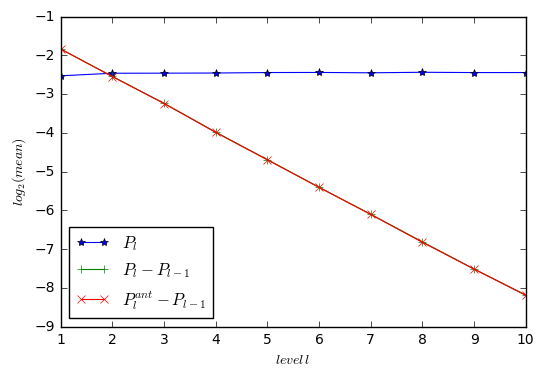

In [55]:
plt.figure()

plt.plot(xaxis, np.log(abs(var0)), linewidth=0.8, marker="*", label='$P_{l}$')
plt.plot(xaxis, np.log(abs(var1)), linewidth=0.8, marker="+", label='$P_{l} - P_{l-1} $')
plt.plot(xaxis, np.log(abs(var2)), linewidth=0.8, marker="x", label='$P^{ant}_{l} - P_{l-1}$')

plt.xlabel('$level\, l$')
plt.ylabel('$log_{2}(mean)$')
plt.legend(loc='best')

plt.show()


In [50]:
print(var2)

[-0.15849282 -0.07788613 -0.0389295  -0.01846477 -0.00909105 -0.00446662
 -0.00222276 -0.00108334 -0.00054217 -0.00027563]
